In [1]:
import numpy as np
import matplotlib.pyplot as plt
from clustertools.load_data import load_spiral_data, load_aggregation_data, load_birch1_data, load_birch3_data, load_compound_data, load_flame_data, load_pathbased_data, load_sets_data, scale_data, load_fuzzy_data
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
#set font sizes for matplotlib plots and seaborn plots
fontsizeset = 20
rc={'axes.labelsize': fontsizeset, 'font.size': fontsizeset, 'legend.fontsize': fontsizeset, 'axes.titlesize': fontsizeset,'xtick.labelsize': fontsizeset, 'ytick.labelsize': fontsizeset}
sns.mpl.rcParams.update(rc)

### Data sets

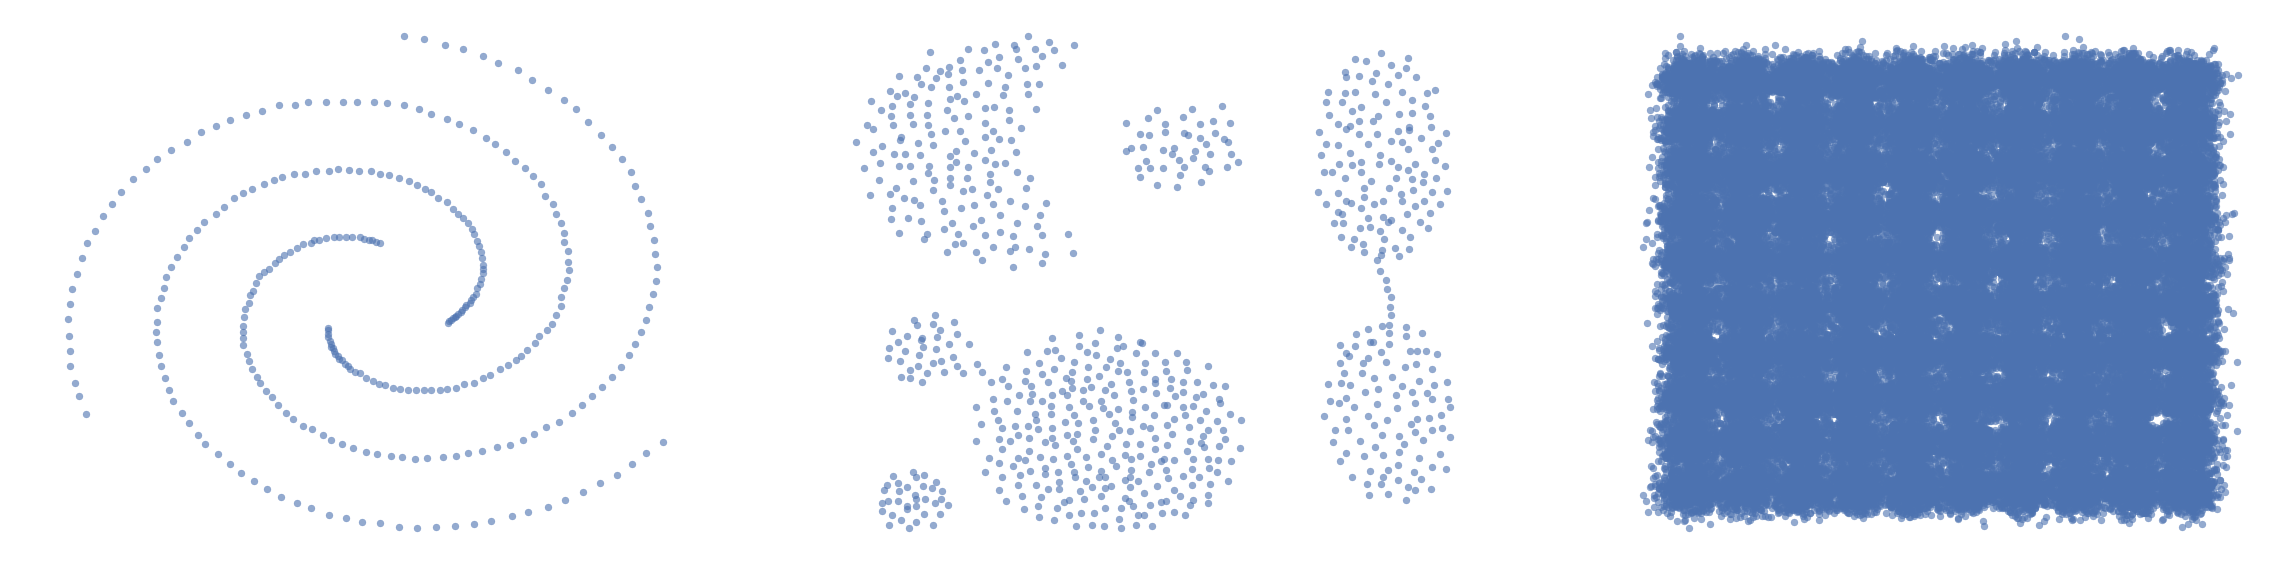

In [3]:
f, axarr = plt.subplots(1,3, figsize=(40,10))

spiral=load_spiral_data(scale = 'True')
axarr[0].scatter(spiral[:,0],spiral[:,1],alpha=.6)
axarr[0].axis('off')

aggr=load_aggregation_data(scale = 'True')
axarr[1].scatter(aggr[:,0],aggr[:,1],alpha=.6)
axarr[1].axis('off')

birch1=load_birch1_data(scale = 'True')
axarr[2].scatter(birch1[:,0],birch1[:,1],alpha=.6)
axarr[2].axis('off')

plt.show()

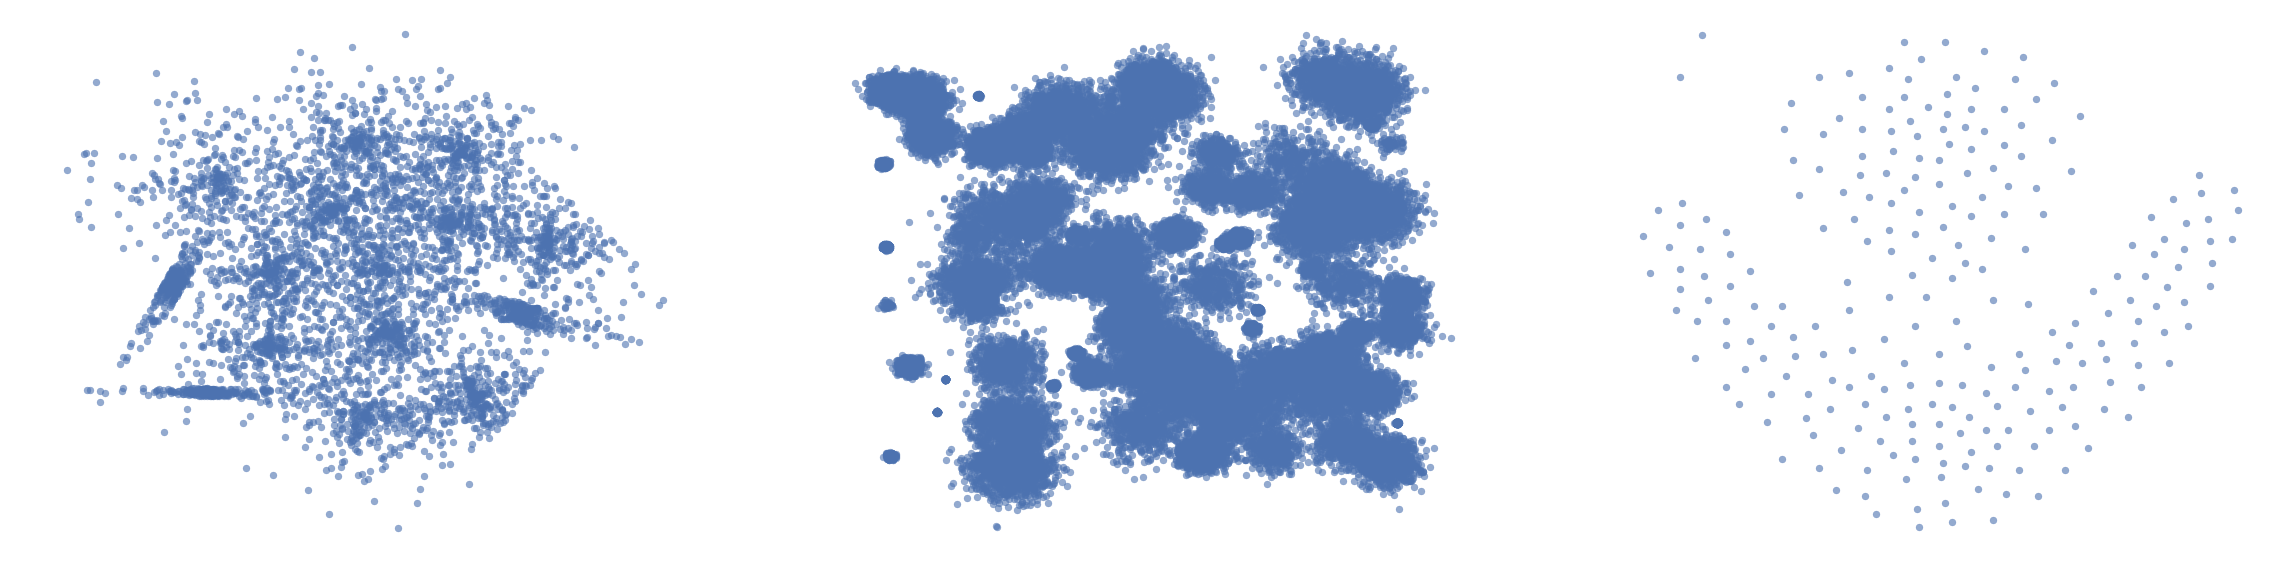

In [4]:
f, axarr = plt.subplots(1,3, figsize=(40,10))

sets=load_sets_data(scale = 'True')
axarr[0].scatter(sets[:,0],sets[:,1],alpha=.6)
axarr[0].axis('off')

birch3=load_birch3_data(scale = 'True')
axarr[1].scatter(birch3[:,0],birch3[:,1],alpha=.6)
axarr[1].axis('off')

flame=load_flame_data(scale = 'True')
axarr[2].scatter(flame[:,0],flame[:,1],alpha=.6)
axarr[2].axis('off')

plt.show()

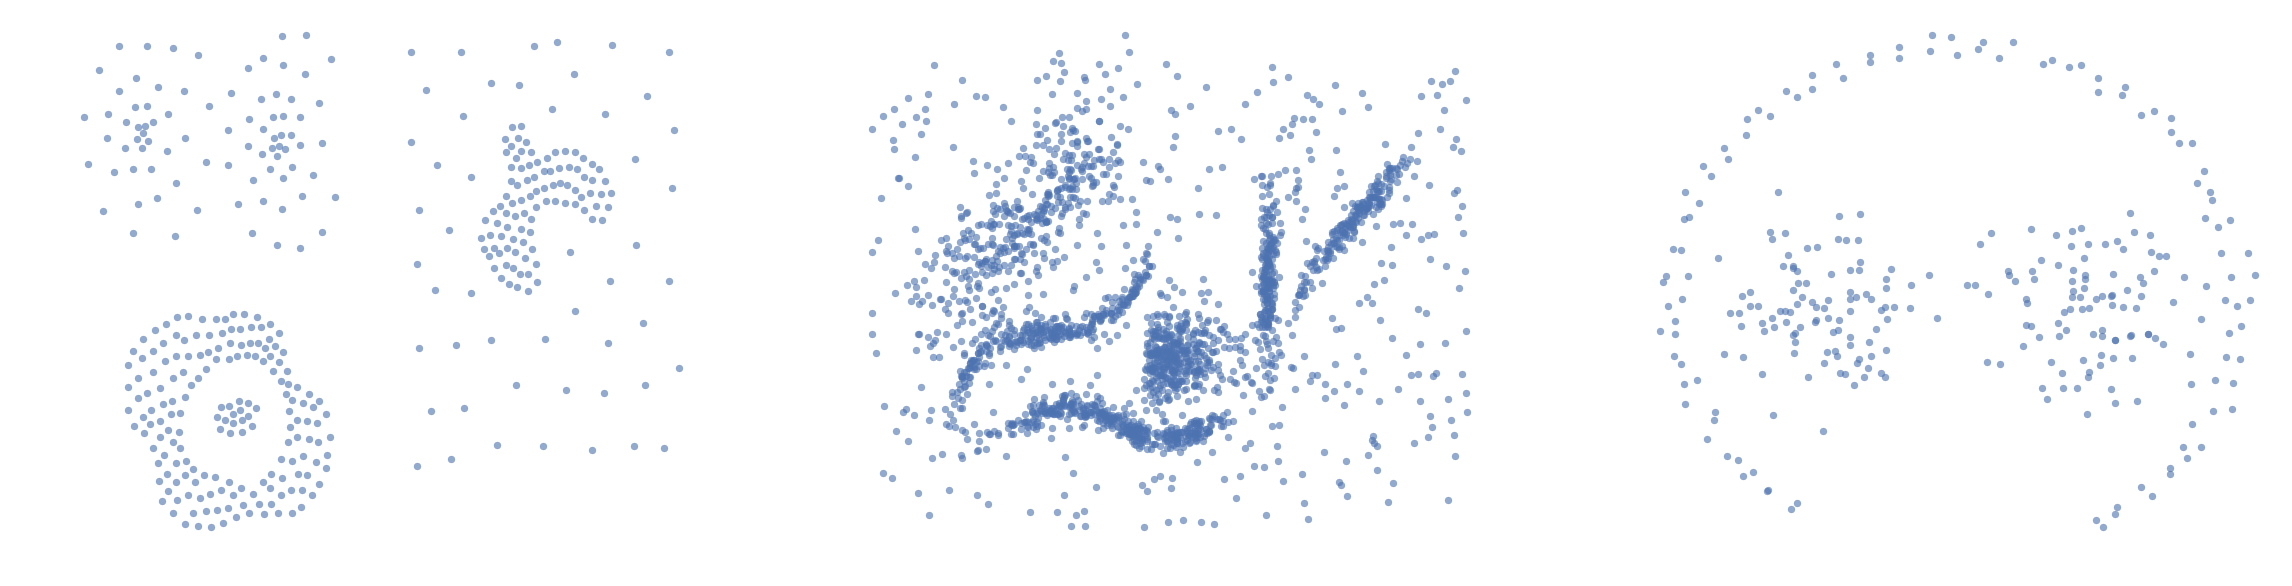

In [5]:
f, axarr = plt.subplots(1,3, figsize=(40,10))

compound = load_compound_data(scale = 'True')
axarr[0].scatter(compound[:,0],compound[:,1],alpha=.6)
axarr[0].axis('off')

fuzzy = load_fuzzy_data(scale = 'True')
axarr[1].scatter(fuzzy[:,0],fuzzy[:,1],alpha=.6)
axarr[1].axis('off')

pathbased = load_pathbased_data(scale = 'True')
axarr[2].scatter(pathbased[:,0],pathbased[:,1],alpha=.6)
axarr[2].axis('off')

plt.show()

In [6]:
def format_subplots():
    plt.figure(figsize=(30,8))
    ax1 = plt.subplot2grid((2,5), (0, 0))
    ax2 = plt.subplot2grid((2,5), (0, 1))
    ax3 = plt.subplot2grid((2,5), (0, 2))
    ax4 = plt.subplot2grid((2,5), (0, 3))
    ax5 = plt.subplot2grid((2,5), (0, 4))
    ax6 = plt.subplot2grid((2,5), (1,0), colspan=6)
    ax = [ax1,ax2, ax3, ax4, ax5]
    row_labels=[ 'Computing time [s]', 'iter = # of iterations',  'k = # of clusters', 'Mean cluster-center distance']
    column_labels=['Spiral','Aggregation','Compound', 'Fuzzy', 'Pathbased']
    return ax, row_labels, column_labels

In [7]:
def format_table_data(dataset,estimatecluster, saveas = 'images/tabledataset.png'):
    ax, row_labels, column_labels = format_subplots()
    row_labels = ['       n = # of datapoints', 'd = dimension', 'estimated # of clusters']
    datasetresults = np.zeros((3,np.shape(dataset)[0]))
    for i in range(np.shape(dataset)[0]):
        data = dataset[i]
        datasetresults[ 0,i] = int(np.size(data,0))
        datasetresults[ 1,i] = int(np.size(data,1))
        ax[i].scatter(data[:,0],data[:,1],alpha=.3)
        ax[i].axis('off')
    datasetresults[2,:] = estimatecluster

    df = pd.DataFrame(datasetresults[:,:],row_labels , column_labels)
    ax6 = sns.heatmap(df,vmin=0, vmax=100000, annot=True,cbar = False, fmt="g", linewidths=1, cmap="GnBu",annot_kws={"size": fontsizeset})
    plt.title('Data sets', fontsize=fontsizeset)
    plt.show()
    #plt.savefig(saveas)

Taking at look at some data sets in more detail

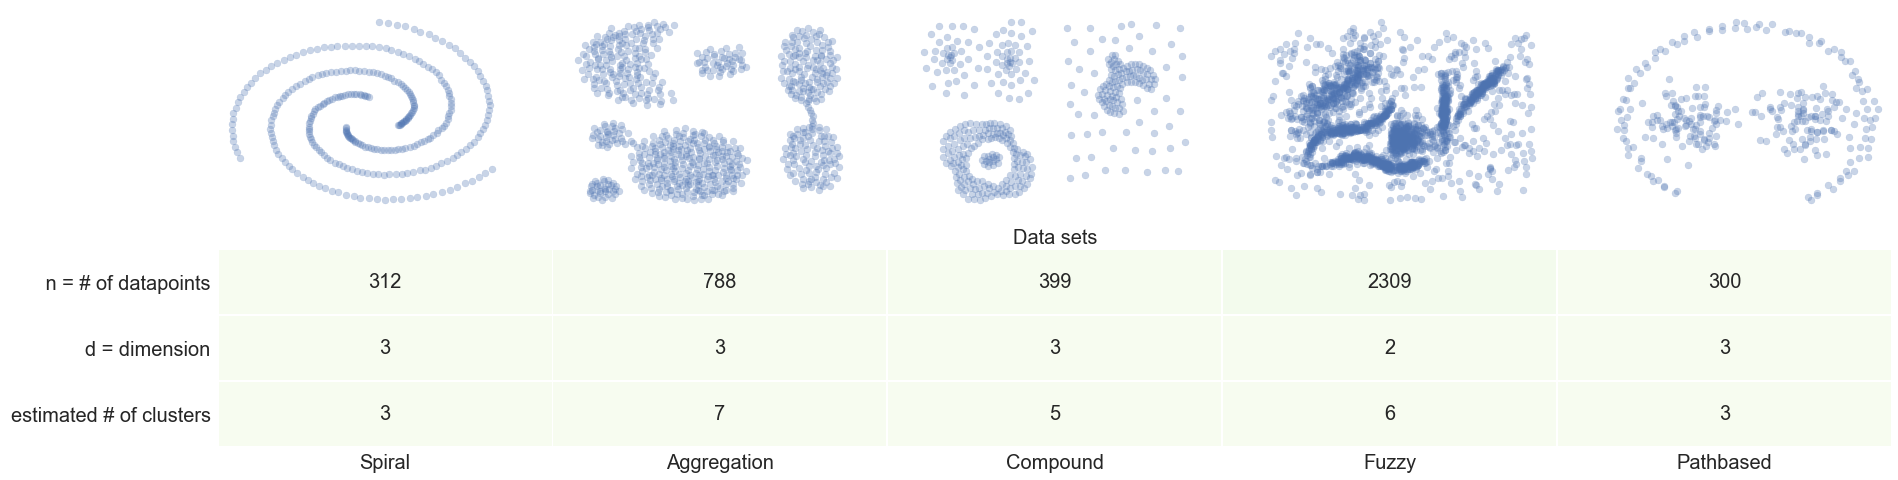

In [8]:
dataset = [spiral, aggr, compound, fuzzy, pathbased]
format_table_data(dataset, np.array([3,7,5,6,3]))